# Predictive Analytic Wine Quality

# Importing Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

import json

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Describing the dataset

In [2]:
df = pd.read_csv('wine_quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Understanding

## Explatory Data Analysis

### Univariate Analysis

Pada data ini klasifikasi hanya dimiliki oleh data target dan data fitur memiliki nilai kontinu.

   sample count  percentage
5           681        42.6
6           638        39.9
7           199        12.4
4            53         3.3
8            18         1.1
3            10         0.6


<AxesSubplot:xlabel='quality', ylabel='Count'>

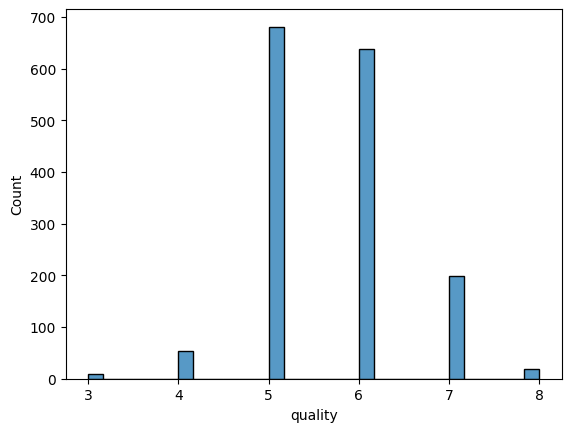

In [4]:
count = df['quality'].value_counts()
percent = 100*df['quality'].value_counts(normalize=True)
df_sample_percentage = pd.DataFrame({'sample count':count, 'percentage':percent.round(1)})
print(df_sample_percentage)
sns.histplot(df['quality'])

Pada gambar di atas maka dapat diketahui bahwa data berisikan data dengan dominasi pada qualitas 5 dan 6. Pada dataset juga tidak memiliki data dengan qualitas 2, 9 dan 10.

## Multivariate Analisis

<Figure size 1800x1400 with 0 Axes>

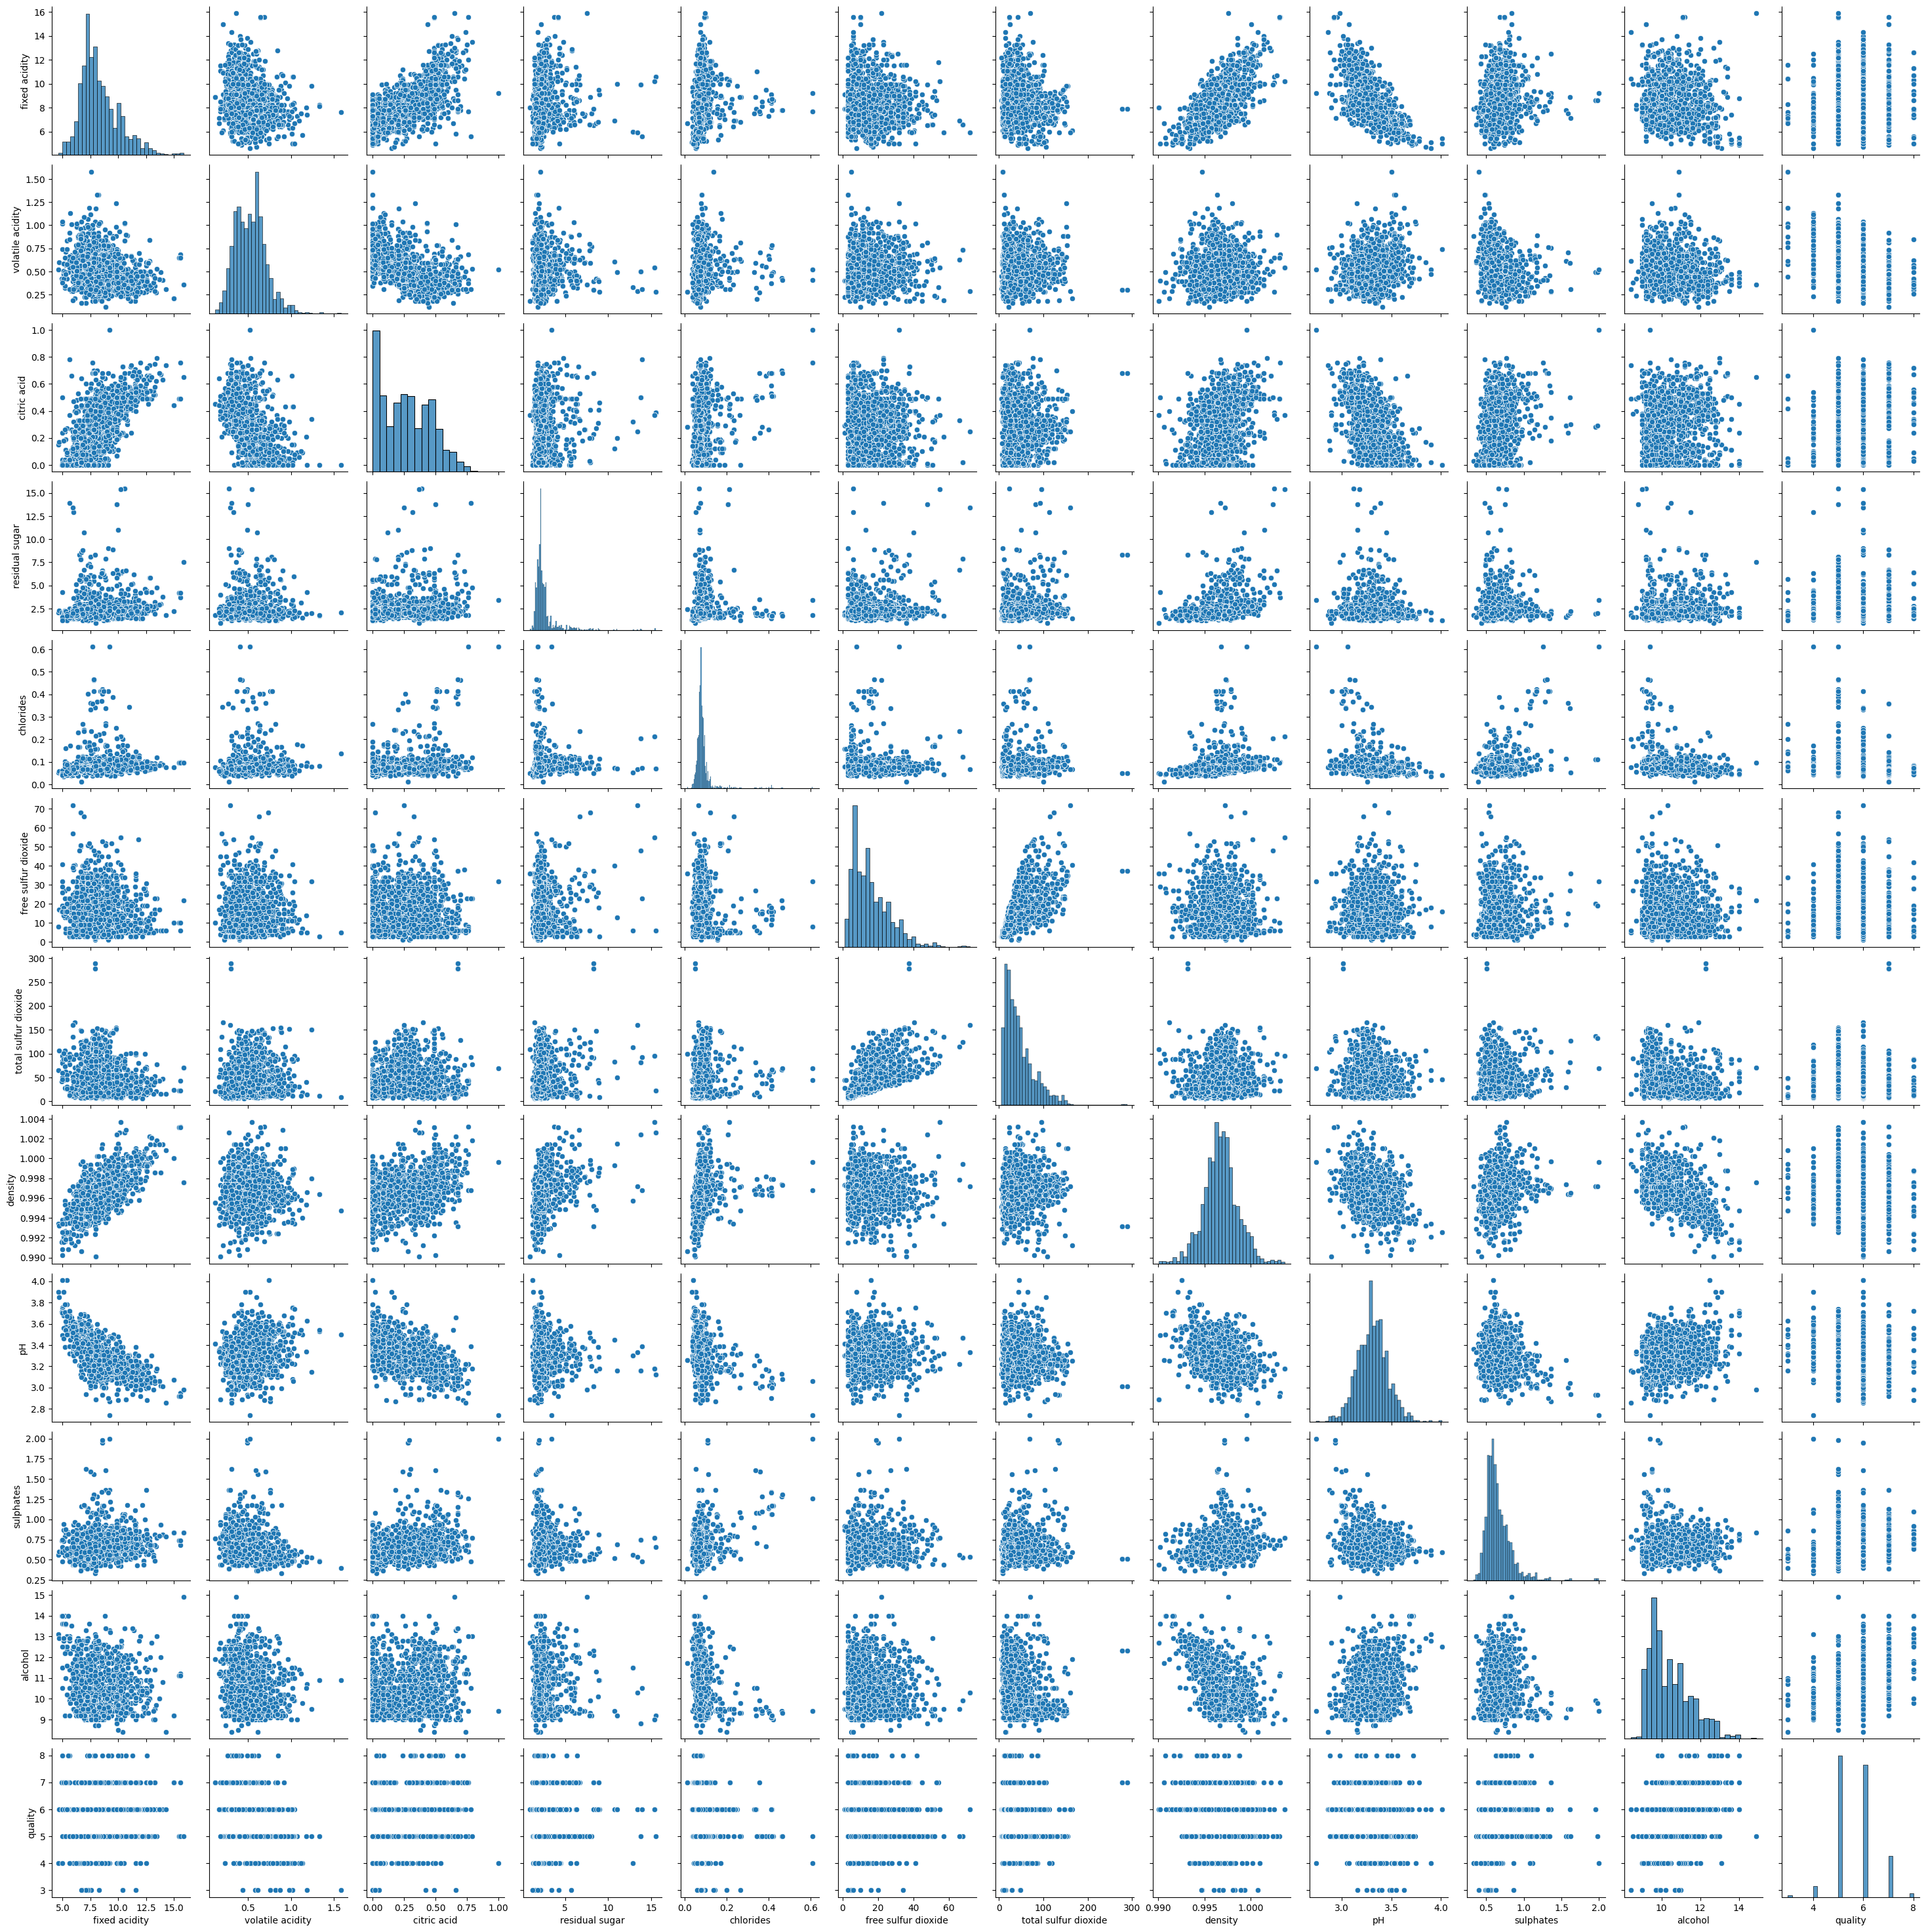

In [5]:
plt.figure(figsize=(18,14))
sns.pairplot(df)

Pada data pairplot dapat dilihat bahwa: <br>
<ul>
    <li>Qualitas cenderung memiliki relasi positif dengan alcohol dan berelasi negatif dengan volatile acid</li>
    <li>Alcohol cenderung berelasi negatif dengan densitas</li>
    <li>pH memiliki relasi negatif dengan fixed acidity</li>
    <li>Total sulfur dioxide beralasi positif dengan free sulfur dioxide memiliki relasi negatif dengan fixed acidity</li>
    <li>Citric Acid berelasi positif dengan fixed acidity dan beralasi negatif dengan pH</li>
</ul>


dari data di atas akan dilakukan relasi proving menggunakan heatmap

<AxesSubplot:>

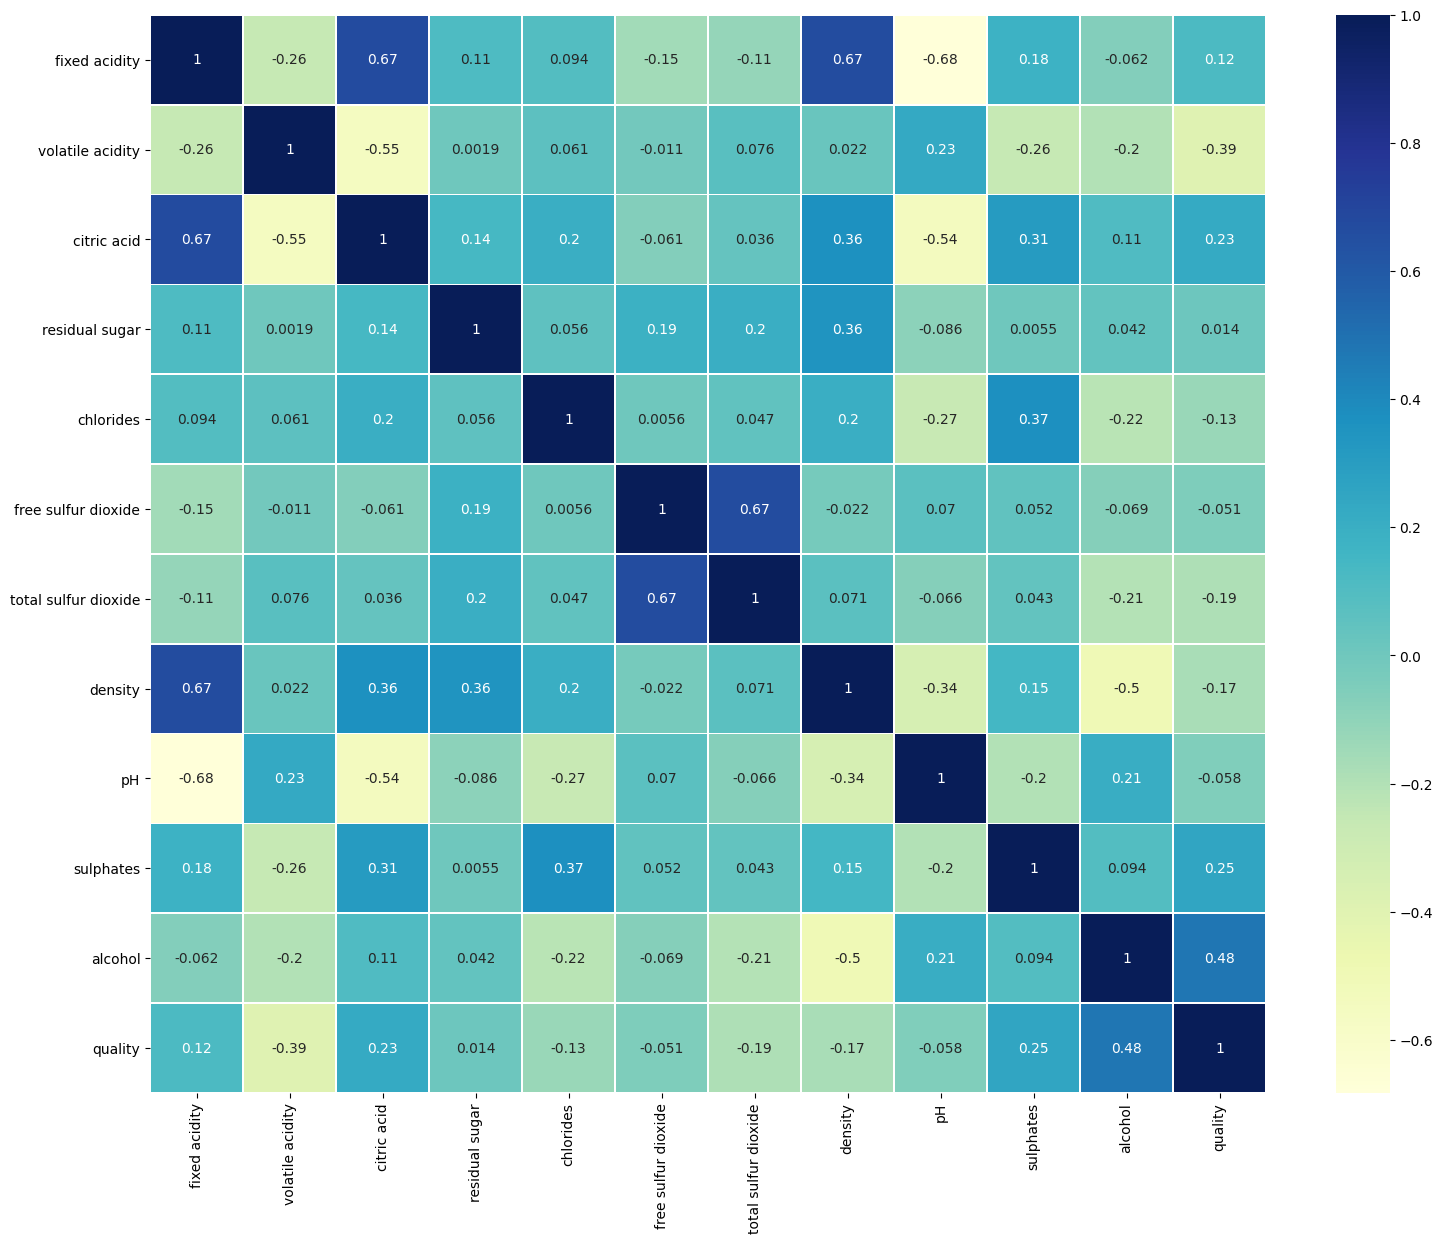

In [6]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels = df.columns, annot=True,
            linewidths=0.5, cmap = "YlGnBu")

Pada heatmap di atas dapat dilihat untuk persebaran relasi antar fitur sebagai berikut:
<ul>
    <li>relasi positif quality dan alcohol</li>
    <li>relasi positif cenderung quality dan citric acid</li>
    <li>sulphates relasi positif dengan chlorides dan citric acid</li>
    <li>pH relasi negatif dengan citric acid dan dengan density</li>
    <li>relasi negatif dengan density dengan alcohol dan dengan pH dan relasi positif dengan fixed acidity</li>
</ul>

# Data Preparation

pada tahap ini akan dilakukan penyeragaman satuan data dengan code di bawah.

In [7]:
df['density'] = df['density']/1000
df['free sulfur dioxide'] = df['free sulfur dioxide']/0.001
df['total sulfur dioxide'] = df['total sulfur dioxide']/0.001

pada describe di bawah menunjukkan penyeragaman data pada fitur densitas, free sulfur dioxide dan total sulfur dioxide

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15874.921826,46467.792370,0.000997,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10460.156970,32895.324478,0.000002,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1000.000000,6000.000000,0.000990,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7000.000000,22000.000000,0.000996,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14000.000000,38000.000000,0.000997,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21000.000000,62000.000000,0.000998,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72000.000000,289000.000000,0.001004,4.010000,2.000000,14.900000,8.000000


## Outlier

pada code di bawah akan dilakukan filtrasi pada data dari outlier, proses penanganan outlier diperlukan untuk mengurangi bias pada data dan meningkatkan performa model prediksi.

In [9]:
# checking for outlier
def outlier(vals):
    dict_holder = {}
    for column in vals.columns:
        data = vals[column].to_numpy()
        mean = np.mean(data)
        std = np.std(data)
        threshold_right = 3
        threshold_left = -3
        outlier = []
        for i in data:
            z = (i-mean)/std
            if z > threshold_right or z < threshold_left:
                if i not in outlier:
                    outlier.append(i)
        dict_holder[column] = outlier
    return dict_holder

code di bawah menunjukkan kolom dengan outlier, pada penanganan saya tidak menggunakan visualisasi boxplot untuk menganalisa outlier dikarenakan kurangnya akurasi visualisasi pada gambar untuk menemukan outlier

In [10]:
wine_outlier_json = outlier(df.drop('quality',axis=1))
print("Kolom dengan outlier")
for key in wine_outlier_json:
    print(key)

Kolom dengan outlier
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


code di bawah melakukan masking terhadap data outlier dan melakukan pengecekekan apakah masih terdapat outlier setelah data di masking.

In [11]:
mask_outlier = (df['fixed acidity'].isin(wine_outlier_json['fixed acidity']) == False)\
            & (df['volatile acidity'].isin(wine_outlier_json['volatile acidity']) == False)\
            & (df['citric acid'].isin(wine_outlier_json['citric acid']) == False)\
            & (df['residual sugar'].isin(wine_outlier_json['residual sugar']) == False)\
            & (df['chlorides'].isin(wine_outlier_json['chlorides']) == False)\
            & (df['free sulfur dioxide'].isin(wine_outlier_json['free sulfur dioxide']) == False)\
            & (df['total sulfur dioxide'].isin(wine_outlier_json['total sulfur dioxide']) == False)\
            & (df['density'].isin(wine_outlier_json['density']) == False)\
            & (df['pH'].isin(wine_outlier_json['pH']) == False)\
            & (df['sulphates'].isin(wine_outlier_json['sulphates']) == False)\
            & (df['alcohol'].isin(wine_outlier_json['alcohol']) == False)

df_wine_clean_outlier = df[mask_outlier]

outlier_checker = outlier(df_wine_clean_outlier.drop('quality',axis=1))

for key in outlier_checker:
    print("{} memiliki outlier sebanyak {} data".format(key, len(outlier_checker[key])))

fixed acidity memiliki outlier sebanyak 3 data
volatile acidity memiliki outlier sebanyak 2 data
citric acid memiliki outlier sebanyak 0 data
residual sugar memiliki outlier sebanyak 17 data
chlorides memiliki outlier sebanyak 22 data
free sulfur dioxide memiliki outlier sebanyak 3 data
total sulfur dioxide memiliki outlier sebanyak 10 data
density memiliki outlier sebanyak 3 data
pH memiliki outlier sebanyak 4 data
sulphates memiliki outlier sebanyak 10 data
alcohol memiliki outlier sebanyak 3 data


code di bawah mengiterasi masking outlier sehingga tidak ditemukan lagi outlier pada data

In [12]:
iterate = True

while iterate:
    holder = []

    wine_outlier_json = outlier(df_wine_clean_outlier.drop('quality',axis=1))

    mask_outlier = (df_wine_clean_outlier['fixed acidity'].isin(wine_outlier_json['fixed acidity']) == False)\
                & (df_wine_clean_outlier['volatile acidity'].isin(wine_outlier_json['volatile acidity']) == False)\
                & (df_wine_clean_outlier['citric acid'].isin(wine_outlier_json['citric acid']) == False)\
                & (df_wine_clean_outlier['residual sugar'].isin(wine_outlier_json['residual sugar']) == False)\
                & (df_wine_clean_outlier['chlorides'].isin(wine_outlier_json['chlorides']) == False)\
                & (df_wine_clean_outlier['free sulfur dioxide'].isin(wine_outlier_json['free sulfur dioxide']) == False)\
                & (df_wine_clean_outlier['total sulfur dioxide'].isin(wine_outlier_json['total sulfur dioxide']) == False)\
                & (df_wine_clean_outlier['density'].isin(wine_outlier_json['density']) == False)\
                & (df_wine_clean_outlier['pH'].isin(wine_outlier_json['pH']) == False)\
                & (df_wine_clean_outlier['sulphates'].isin(wine_outlier_json['sulphates']) == False)\
                & (df_wine_clean_outlier['alcohol'].isin(wine_outlier_json['alcohol']) == False)

    df_wine_clean_outlier = df_wine_clean_outlier[mask_outlier]

    wine_outlier_json = outlier(df_wine_clean_outlier.drop('quality',axis=1))

    for key in wine_outlier_json:
        result = any(item in wine_outlier_json[key] for item in wine_outlier_json[key])
        if result == True:
            holder.append(True)

    result = any(item in holder for item in holder)

    if result == False:
        break

outlier(df_wine_clean_outlier.drop('quality', axis=1))

{'fixed acidity': [],
 'volatile acidity': [],
 'citric acid': [],
 'residual sugar': [],
 'chlorides': [],
 'free sulfur dioxide': [],
 'total sulfur dioxide': [],
 'density': [],
 'pH': [],
 'sulphates': [],
 'alcohol': []}

## Label Encoding

pada code di bawah akan dilakukan perubahan pada target data dengan mengubah data dengan nilai >= 6 akan dikategorikan sebagai kualitas baik dan data dengan nilai < 6 akan dikategorikan sebagai kualitas buruk. Baik == 1 dan Buruk == 0.

In [14]:
threshold = 6

df_wine_clean_outlier['quality'] = np.where(df_wine_clean_outlier['quality'] >= threshold, 1, 0)

code di bawah menunjukkan histplot dari encoding target data dan dapat dilihat bahwa data memiliki lebih banyak data dengan kualitas wine baik yang mana seusai dengan tujuan awal pembuatan model untuk industri F&B sehingga dibutuhkan wine dengan kualitas baik, dengan persebaran data ini diharapkan memodel memiliki keketatan dalam memprediksi kualitas wine.

   sample count  percentage
1           669        54.8
0           551        45.2


<AxesSubplot:xlabel='quality', ylabel='Count'>

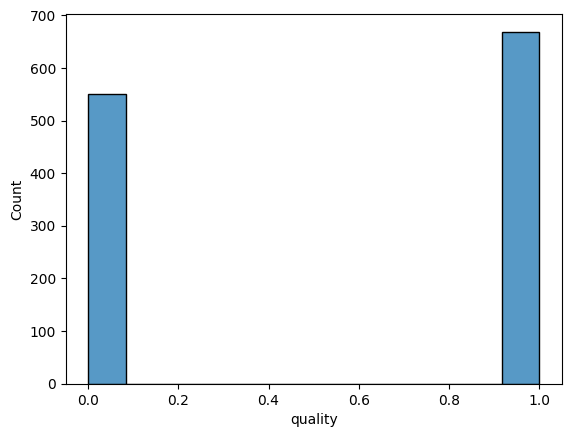

In [15]:
count = df_wine_clean_outlier['quality'].value_counts()
percent = 100*df_wine_clean_outlier['quality'].value_counts(normalize=True)
df_sample_percentage = pd.DataFrame({'sample count':count, 'percentage':percent.round(1)})
print(df_sample_percentage)
sns.histplot(df_wine_clean_outlier['quality'])

## Scaling data dengan Min Max Scaler

Pada code di bawah akan dilakukan pengaturan skala data menggunakan min max scaler tujuannya untuk mempermudah model mengolah data dengan nilai yang telah di reduksi skalanya menggunakan z score.

In [16]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_wine_clean_outlier.drop(["quality"],axis=1))
df_wine_scaled = scaler.transform(df_wine_clean_outlier.drop(["quality"],axis=1))
df_wine_scaled = pd.DataFrame(df_wine_scaled, columns=df_wine_clean_outlier.drop(["quality"],axis=1).columns)
df_wine_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,0.399559,0.448966,0.338802,0.434390,0.477483,0.344734,0.318756,0.515110,0.506301,0.467339,0.367379
std,0.201059,0.184993,0.251584,0.190356,0.176513,0.218922,0.227885,0.181806,0.172943,0.179077,0.212336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.300000,0.108108,0.311111,0.364706,0.168750,0.145455,0.394939,0.387500,0.338462,0.173913
50%,0.346154,0.444444,0.324324,0.400000,0.470588,0.300000,0.263636,0.515952,0.512500,0.446154,0.315217
75%,0.512821,0.566667,0.540541,0.577778,0.576471,0.475000,0.438636,0.625963,0.612500,0.569231,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting data

Pada code di bawah akan dilakukan pembagian train data dan test data agar dapat dilakukan evaluasi terhadap model yang telah dibuat.

In [17]:
X = df_wine_scaled
y = df_wine_clean_outlier["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

pada code di bawah akan dilakukan modeling klasifikasi menggunakan algoritme logistic regression, support vector machine dan random forest

In [19]:
logreg = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()


logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)


logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)


# Evaluation

Pada model ini akan dilakukan evaluasi matrics menggunakan accuracy, precision, recall dan f1 score. Tujuan utama dari pembuatan model ini adalah dengan mengambil model dengan nilai recall lebih rendah. Dikarenakan jika nilai recall rendah maka nilai false negative akan lebih besar yang artinya akan lebih ketat dalam model memprediksi suatu kualitas wine dikatakan baik. Sehingga perusahaan atau industri yang menggunakan model ini akan lebih mungkin mendapatkan kualitas wine baik lebih besar. Tetapi untuk pemilihan model akan diukur juga menggunakan f1 score, nilai f1 score = 1 memiliki arti bahwa data memiliki balance antara precision dan recall. 

In [20]:
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

svc_acc = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)

rf_acc = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)


results = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [logreg_acc, svc_acc, rf_acc],
    'Precision': [logreg_precision, svc_precision, rf_precision],
    'Recall': [logreg_recall, svc_recall, rf_recall],
    'F1 Score': [logreg_f1, svc_f1, rf_f1]
}


df_model_eval = pd.DataFrame(results)

df_model_eval

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.733607,0.767442,0.738806,0.752852
1,SVM,0.786885,0.841667,0.753731,0.795276
2,Random Forest,0.819672,0.868852,0.791045,0.828125


Dari hasil model di atas maka model yang paling optimum digunakan adalah **Random Forest**. Random Forest memiliki nilai f1 score yang paling mendekati 1 dan nilai recall lebih rendah dibandingkan dengan precision, maka dengan itu model random forest memiliki performa lebih baik untuk penyelesaikan model bisnis yang akan dilakukan.